In [1]:
import norse
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
d0 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d = []
for t in d0:
    d.append(t)
    for i in range(9):
        d.append(0)
len(d)

1000

In [3]:
c = norse.torch.LIFBoxCell(
    p = norse.torch.LIFBoxParameters(
        tau_mem_inv=torch.as_tensor(400),
        v_th=torch.as_tensor(0.1),
    ),
    dt=0.0001
)

In [4]:
vs = []
zs = []
s = None
for t in torch.tensor(d):
    z, s = c(t, s)
    zs.append(z.detach().numpy())
    vs.append(s.v.detach().numpy())
zs = np.array(zs)

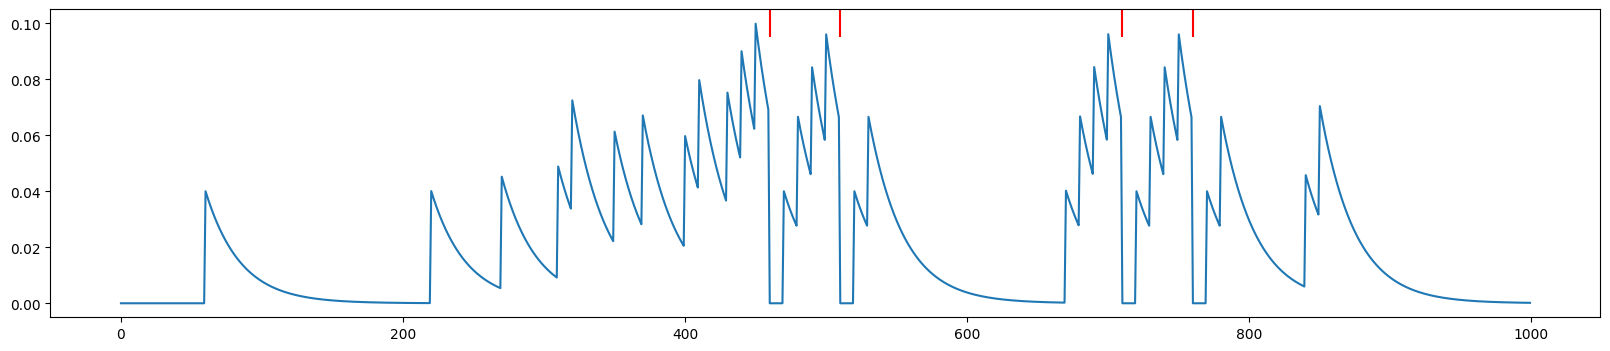

In [5]:
spikes = np.argwhere(zs > 0)
plt.figure(figsize=(20, 4))
plt.plot(vs)
plt.scatter(spikes, np.ones_like(spikes) * 0.1, marker="|", c="red", s=400)
zs = np.array(zs)
zs[zs > 0]
plt.savefig("lif_trace_norse.png")

In [6]:
nir_graph = norse.torch.to_nir(c, torch.tensor(d), "lif")
nir_graph

NIRGraph(nodes={'input': Input(shape=array([1000])), 'lif': LIF(tau=tensor(0.0025), r=tensor(1.), v_leak=tensor(0.), v_threshold=tensor(0.1000)), 'output': Output(shape=torch.Size([1000]))}, edges=[('input', 'lif'), ('lif', 'output')])

In [7]:
import nir
import importlib
importlib.reload(nir)

<module 'nir' from '/home/jens/work/nir/nir/nir/__init__.py'>

In [8]:
nir.write("lif_norse.nir", nir_graph)

In [9]:
nir.read("lif_norse.nir")

NIRGraph(nodes={'input': Input(shape=array([1000])), 'lif': LIF(tau=0.0025, r=1.0, v_leak=0.0, v_threshold=0.1), 'output': Output(shape=array([1000]))}, edges=array([['input', 'lif'],
       ['lif', 'output']], dtype=object))